In [1]:
%pip install teeplot
from teeplot import teeplot as tp


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OSF identifier
data_id = "9qetu"

# Load CSV file into DataFrame directly from OSF URL
data_df = pd.read_csv(f"https://osf.io/{data_id}/download")

# Rename columns for clarity if needed
data_df.rename(columns={
    'Head Count': 'head_count',
    'Unit': 'unit',
    'Time': 'time',
    'replicate': 'replicate',
    'treatment': 'treatment',
    'NTASKS': 'ntasks'
}, inplace=True)

# Average the data by head_count, unit, and replicate
avg_data = data_df.groupby(['head_count', 'unit', 'replicate'])['time'].mean().reset_index()


teeplots/viz=time-per-tip-plot+ext=.pdf
teeplots/viz=time-per-tip-plot+ext=.png


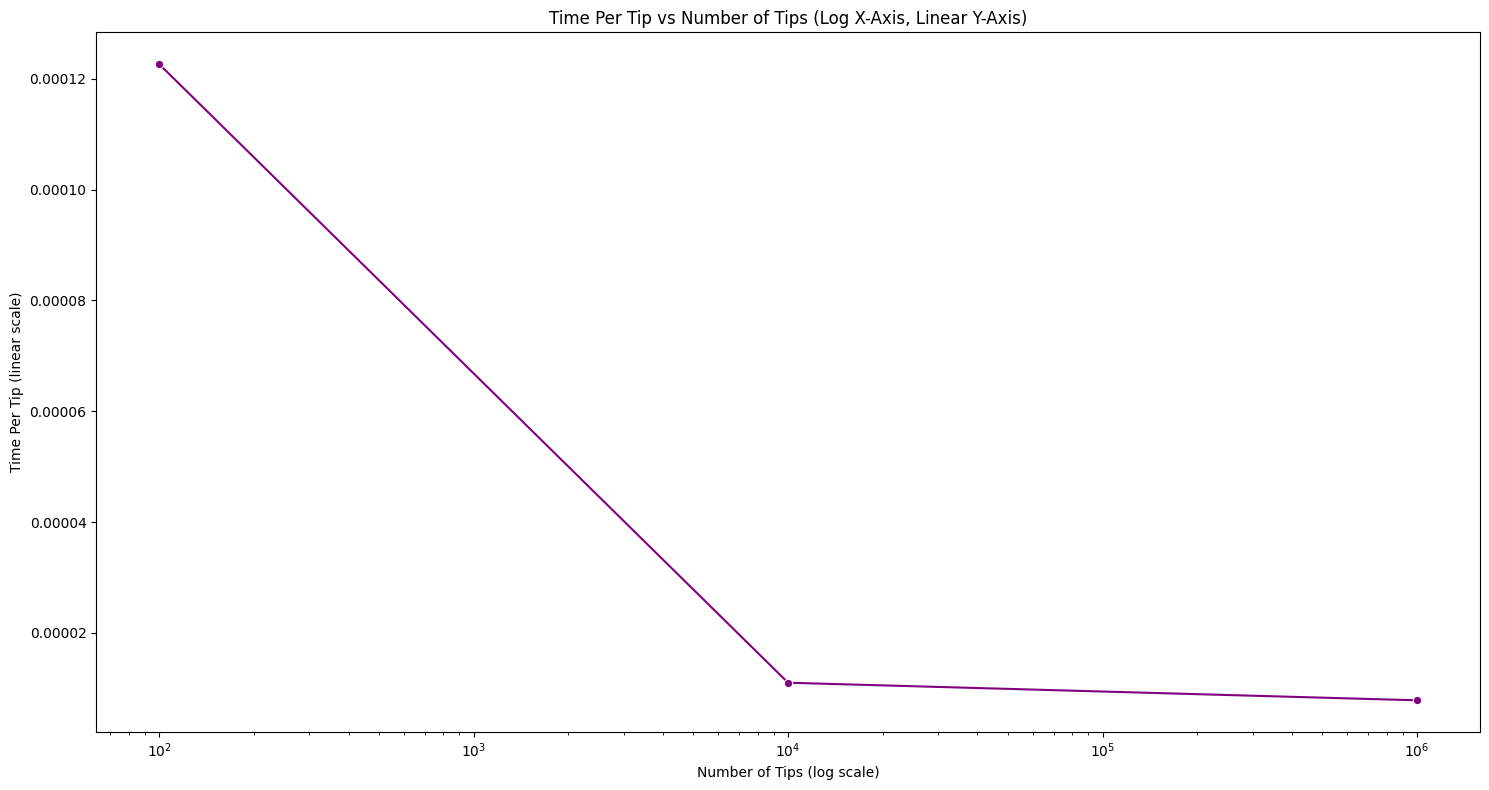

In [3]:
# time per tip (linear y-axis) vs. number of tips (log x-axis)
def time_per_tip_plot(data):
    # Calculate time per tip
    data['time_per_tip'] = data['time'] / data['head_count']

    # Filter the subset for Real Seconds
    avg_subset = data[data['unit'] == 'Real Seconds'].groupby(['head_count'])['time_per_tip'].mean().reset_index()

    plt.figure(figsize=(15, 8))
    sns.lineplot(
        data=avg_subset,
        x='head_count',
        y='time_per_tip',
        marker='o',
        color="purple"
    )

    plt.xscale('log')  # Logarithmic scale for the number of tips
    plt.title('Time Per Tip vs Number of Tips (Log X-Axis, Linear Y-Axis)')
    plt.xlabel('Number of Tips (log scale)')
    plt.ylabel('Time Per Tip (linear scale)')
    plt.tight_layout()

tp.tee(time_per_tip_plot, data=avg_data)
